In [1]:
import pandas as pd

annoy_df = pd.read_csv('../results/index-size/mnist-ann.csv')
hnsw_df = pd.read_csv('../results/index-size/mnist-hnsw.csv')

size = 188160.128

annoy_df['size']  = annoy_df['size'] - size
hnsw_df['size'] = hnsw_df['size'] - size

annoy_df['method'] = "annoy"
hnsw_df['method'] = "hnsw"

In [5]:
cols = ['method', 'size', 'recall']

df = pd.concat([annoy_df[cols].head(11), hnsw_df[cols].head(10)])
print("recall min, recall max, size min, size max")
print(annoy_df["recall"].min(), annoy_df["recall"].max(), annoy_df["size"].min(), annoy_df["size"].max())
print(hnsw_df["recall"].min(), hnsw_df["recall"].max(), hnsw_df["size"].min(), hnsw_df["size"].max())
df.tail(10)

recall min, recall max, size min, size max
0.7625100000000005 0.9885100000000026 3434.684500000003 99601.46575
0.7420599999999995 0.979740000000005 4044.241140625003 56529.205984375


,method,size,recall
0,hnsw,4044.241141,0.74206
1,hnsw,7791.760672,0.76219
2,hnsw,11538.717703,0.76560
3,hnsw,15285.561453,0.91575
4,hnsw,19037.717703,0.95165
5,hnsw,22784.936453,0.96445
6,hnsw,26535.455984,0.96997
7,hnsw,30285.080984,0.97362
8,hnsw,34031.955984,0.97419
9,hnsw,37773.174734,0.97974


<Axes: xlabel='recall', ylabel='size'>

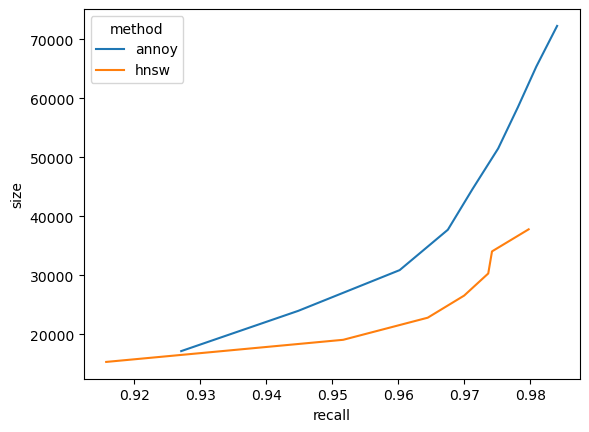

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=df.query('recall > 0.90'), x="recall", y="size", hue="method")

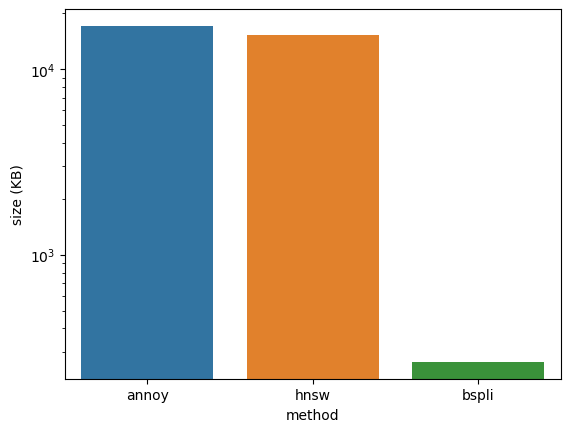

In [4]:
size_df = pd.DataFrame(data={
    'method': ['annoy', 'hnsw', 'bspli'],
    'size': [17120.02825, 15285.561453, 264.079]
})

sns.barplot(data=size_df, x="method", y="size")
ax =  sns.barplot(data=size_df, x="method", y="size", log=True)
ax.set( ylabel='size (KB)')

plt.show()